In [731]:
import warnings
warnings.filterwarnings('ignore')

In [732]:
# Import necessary libraries
import pandas as pd                                                                                                                                                                                                                                                                                                                           # type: ignore
import numpy as np                                                                                                                                                                                                                                                                                                                                                                       # type: ignore
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                          # type: ignore
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                       # type: ignore
from sklearn.model_selection import train_test_split                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               # type: ignore
from sklearn.linear_model import LinearRegression                                                                                                                                                                                                                                                                                                                          # type: ignore
from sklearn.metrics import mean_squared_error, r2_score                                                                                                                                                                                                                                                                                                                                                                       # type: ignore
from sklearn.preprocessing import StandardScaler                                                                                                                                                                                                                                                                                                                                                                       # type: ignore

In [733]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Perdorues\Downloads\Project_Datasets\steps_tracker_data.csv")

In [734]:
print("Initial Data:")
print(df.head())

Initial Data:
         date  steps  distance_km  calories_burned  active_minutes  \
0  08/10/2022   4147         3.11           124.41              41   
1  11/06/2022    323         0.24             9.69               3   
2  28/01/2022   6622         4.97           198.66              66   
3  23/03/2022  11136         8.35           334.08             111   
4  20/05/2022   2718         2.04            81.54              27   

   sleep_hours  water_intake_liters      mood  
0         10.5                 3.77  stressed  
1          6.0                 1.90       sad  
2          6.0                 4.48       sad  
3          8.0                 1.08     tired  
4          4.9                 1.00     tired  


## **Data Preprocessing**

In [735]:
##convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [736]:
##check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date                   0
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood                   0
dtype: int64


In [737]:
##missing values
df.fillna(method='ffill', inplace=True)

In [738]:
#Data Cleaning
## Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [739]:
#Feature Engineering
##create additional features
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

## **Data Visualization**

**We can properly use Dataman as a visualization tool to see the behaviors, and after that we can build the grafics in python.**

Columns in DataFrame: Index(['date', 'steps', 'distance_km', 'calories_burned', 'active_minutes',
       'sleep_hours', 'water_intake_liters', 'mood', 'day_of_week', 'month',
       'year'],
      dtype='object')


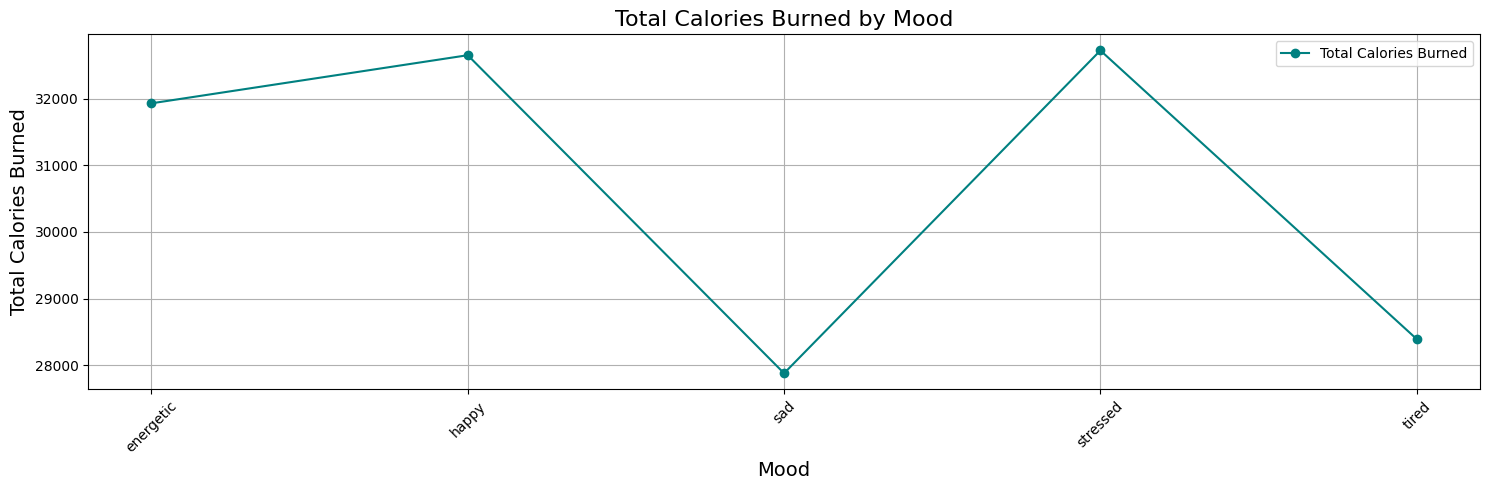

In [740]:
import pandas as pd                                                            # type: ignore
import matplotlib.pyplot as plt                                                # type: ignore

# Check the DataFrame columns
print("Columns in DataFrame:", df.columns)

df.columns = df.columns.str.strip()

if 'mood' in df.columns and 'calories_burned' in df.columns:
    aggregated_data = df.groupby('mood')['calories_burned'].sum().reset_index()

    plt.figure(figsize=(15, 5))
    plt.plot(aggregated_data['mood'], aggregated_data['calories_burned'], marker='o', color='teal', label='Total Calories Burned')
    plt.title('Total Calories Burned by Mood', fontsize=16)
    plt.xlabel('Mood', fontsize=14)
    plt.ylabel('Total Calories Burned', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()

    plt.show()
else:
    print("Columns 'mood' or 'calories_burned' not found in the DataFrame.")

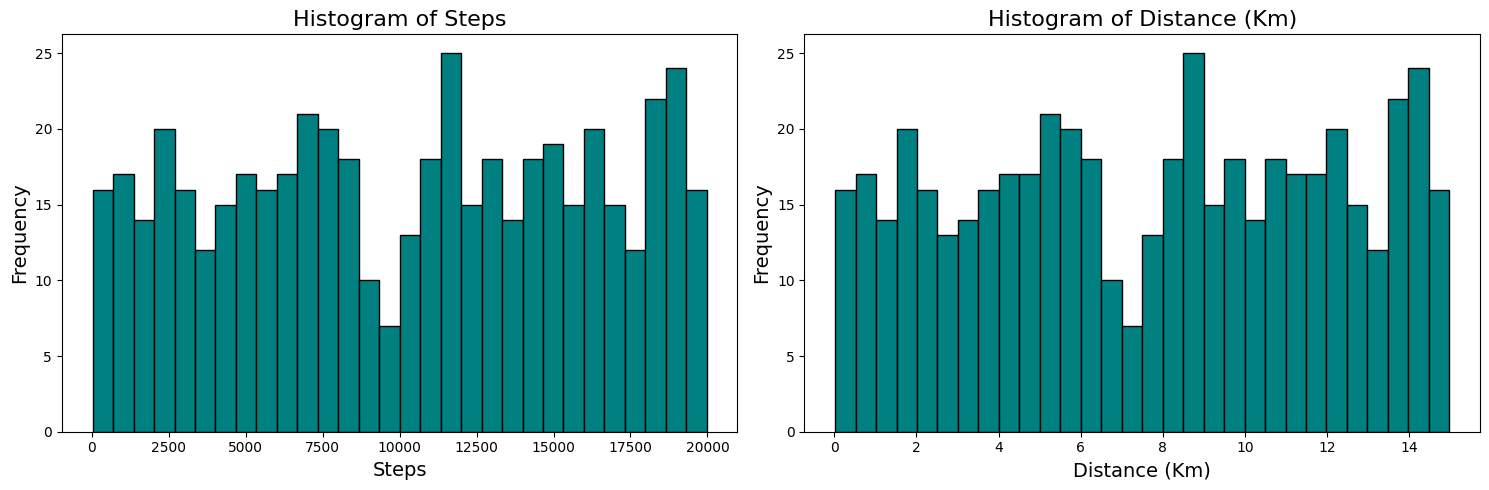

In [741]:
import pandas as pd                                                                                        # type: ignore
import matplotlib.pyplot as plt                                                                            # type: ignore

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df['steps'], bins=30, color='teal', edgecolor='black')
plt.title('Histogram of Steps', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(df['distance_km'], bins=30, color='teal', edgecolor='black')
plt.title('Histogram of Distance (Km)', fontsize=16)
plt.xlabel('Distance (Km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

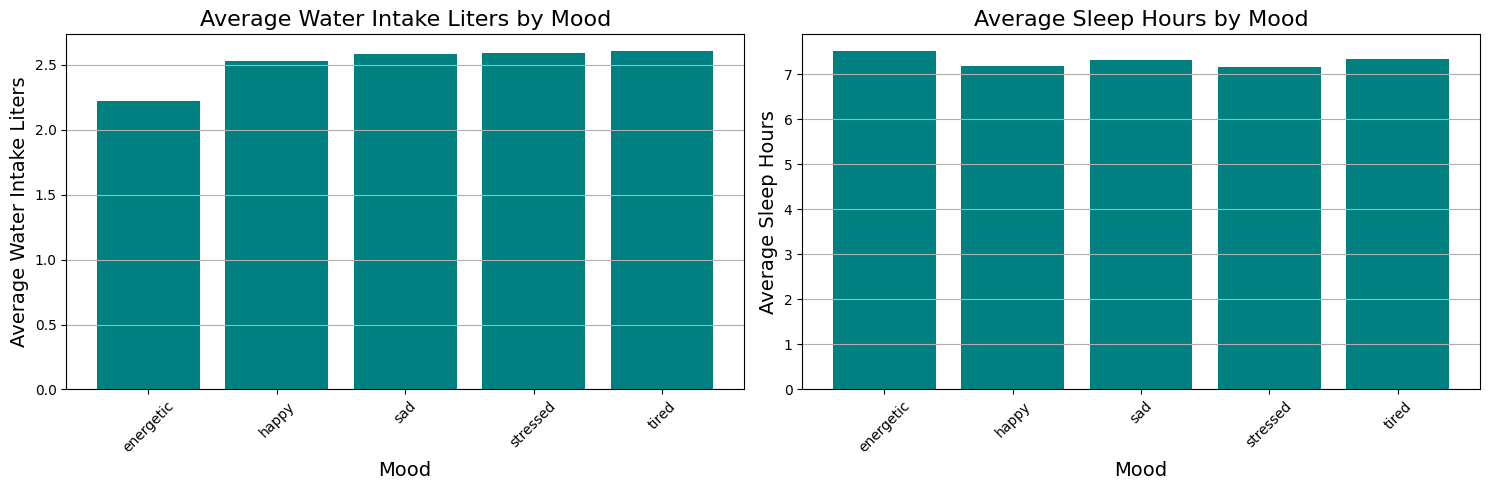

In [742]:
import pandas as pd                                                                               # type: ignore
import matplotlib.pyplot as plt                                                                   # type: ignore

plt.figure(figsize=(15, 5))

#subplot 1: Average Water Intake by Mood
plt.subplot(1, 2, 1)
aggregated_data_water = df.groupby('mood')['water_intake_liters'].mean().reset_index()
plt.bar(aggregated_data_water['mood'], aggregated_data_water['water_intake_liters'], color='teal')
plt.title('Average Water Intake Liters by Mood', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Average Water Intake Liters', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

#subplot 2: Average Sleep Hours by Mood
plt.subplot(1, 2, 2)
aggregated_data_sleep = df.groupby('mood')['sleep_hours'].mean().reset_index()
plt.bar(aggregated_data_sleep['mood'], aggregated_data_sleep['sleep_hours'], color='teal')
plt.title('Average Sleep Hours by Mood', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Average Sleep Hours', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

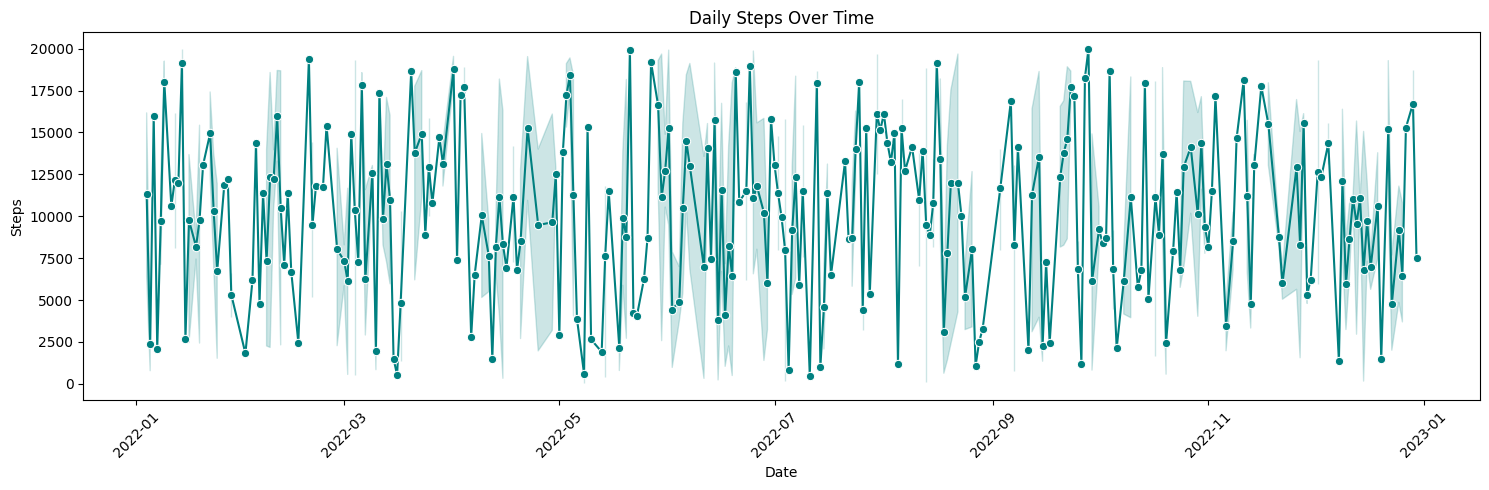

In [743]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='date', y='steps', marker='o', color='teal')
plt.title('Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

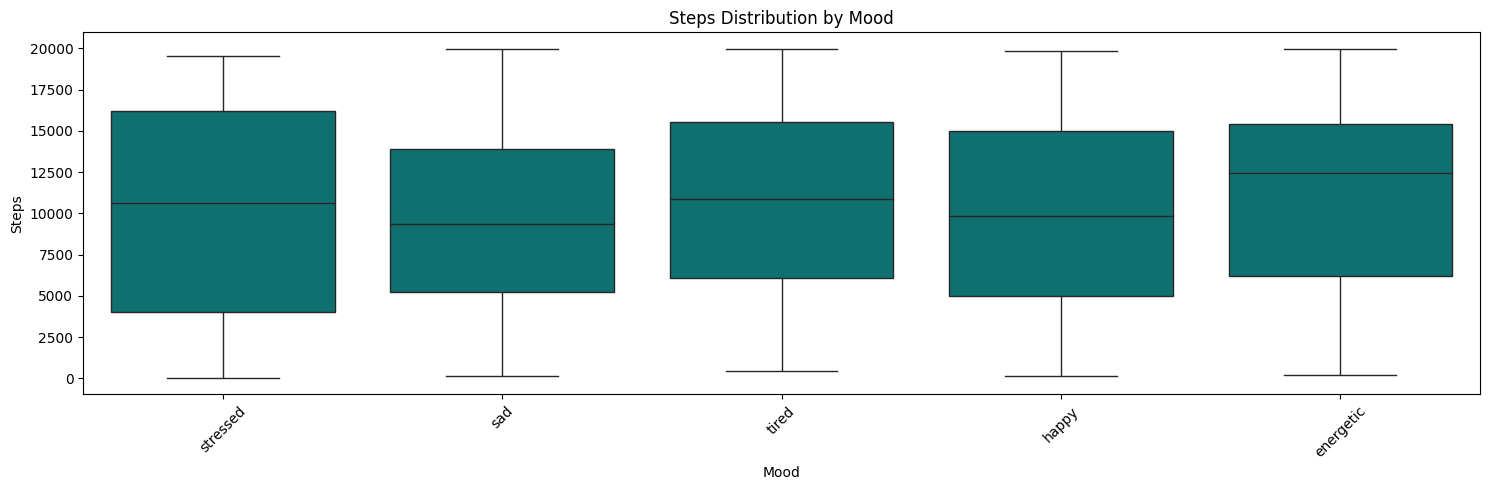

In [744]:
#Mood vs Steps
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='mood', y='steps', color='teal')
plt.title('Steps Distribution by Mood')
plt.xlabel('Mood')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Predicting Future Behaviors**

**Building a simple Machine Learning model to predict future behaviors based on historical data.**

In [745]:
#preparing data for ML model
##convert categorical variables to numerical
df = pd.get_dummies(df, columns=['mood', 'day_of_week'], drop_first=True)

In [746]:
##features and target variable
X = df.drop(columns=['date', 'steps'])
y = df['steps']

In [747]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#splitting the dataset into 70/30 since we do not have a very large ammount of data

In [748]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [749]:

#train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [750]:
#make predictions
y_pred = model.predict(X_test)

In [751]:
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Model Evaluation:
Mean Squared Error: 0.00
R-squared: 1.00


In [752]:
#prepare future data as a DataFrame with the same columns
future_data = pd.DataFrame({
    'distance_km': [5, 10],
    'calories_burned': [150, 300],
    'active_minutes': [60, 120],
    'sleep_hours': [7, 8],
    'water_intake_liters': [2.0, 3.0],
    'month': [4, 4],
    'year': [2023, 2023],
    
    #dummy variables for mood and day_of_week
    'mood_happy': [0, 1],
    'mood_sad': [0, 0],
    'mood_stressed': [1, 0],
    'mood_tired': [0, 0],
    'mood_energetic': [0, 0],
    'day_of_week_Monday': [0, 1],
    'day_of_week_Tuesday': [1, 0],
    'day_of_week_Wednesday': [0, 0],
    'day_of_week_Thursday': [0, 0],
    'day_of_week_Friday': [0, 0],
    'day_of_week_Saturday': [0, 0],
    'day_of_week_Sunday': [0, 0]
})

#future_data must have the same columns as X_train
future_data = future_data.reindex(columns=X.columns, fill_value=0)

#scale future data
future_data_scaled = scaler.transform(future_data)

#predict future steps
future_predictions = model.predict(future_data_scaled)
print("\nFuture Predictions:")
print(future_predictions)


Future Predictions:
[ 5000. 10000.]


**Values:**

**The first value, 5000, is the predicted number of steps for the first set of input features (e.g., for a day with 5 km distance, 150 calories burned, etc.).**
**The second value, 10000, is the predicted number of steps for the second set of input features (e.g., for a day with 10 km distance, 300 calories burned, etc.).**

**Building a simple Time Serie Analysis (TS) Model**

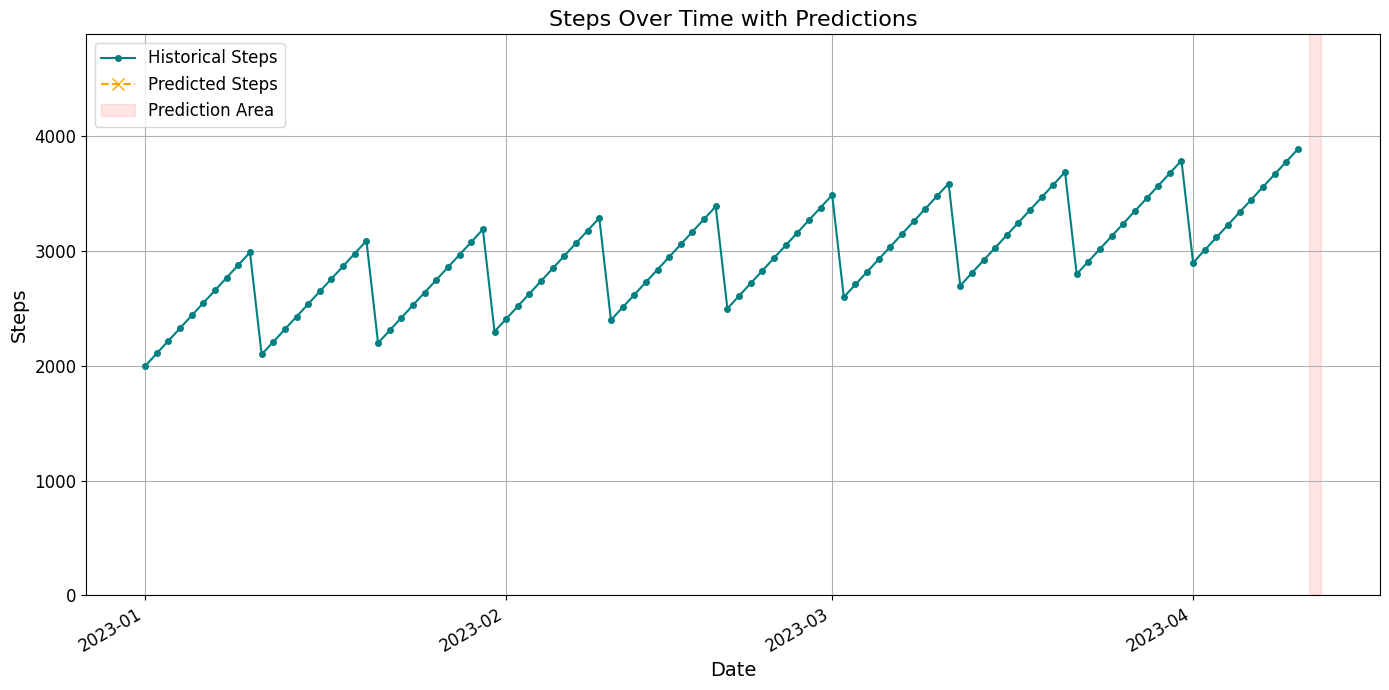

In [753]:
import pandas as pd                               #type: ignore
import matplotlib.pyplot as plt                   #type: ignore
import matplotlib.dates as mdates                 #type: ignore

#sample historical data (replace this with your actual data)
data = {
    'date': pd.date_range(start='2023-01-01', periods=100),
    'steps': [2000 + i * 10 + (i % 10) * 100 for i in range(100)]  # Example steps data
}
df = pd.DataFrame(data)

#sample future predictions (replace this with your actual predictions)
future_predictions = [5000, 10000]  # Example predictions
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=2, freq='D')
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_steps': future_predictions
})

#combine historical and future data
combined_df = pd.concat([df[['date', 'steps']], future_df], ignore_index=True)

plt.figure(figsize=(14, 7))

#historical steps
plt.plot(combined_df['date'], combined_df['steps'], label='Historical Steps', color='teal', marker='o', linestyle='-', markersize=4)

#predicted steps
plt.plot(combined_df['date'], combined_df['predicted_steps'], label='Predicted Steps', color='orange', marker='x', linestyle='--', markersize=8)

#the prediction area
plt.fill_between(future_df['date'], 0, future_df['predicted_steps'], color='red', alpha=0.1, label='Prediction Area')

#date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

#set the y-axis limits based on historical data
plt.ylim(0, combined_df['steps'].max() + 1000)

plt.title('Steps Over Time with Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Steps', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.grid()

plt.show()